In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import os
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
import numpy as np
import re
import math
from pandas import Series
import pandas
import wikipediaapi
import csv
from tqdm import tqdm
from urllib.parse import unquote
import wikipedia
import matplotlib
from scipy import stats

In [ ]:
def get_language_distribution(file_name, language):

    for line in tqdm(open(file_name)):
        out = re.findall('[http|https]://([a-z]{2,3}).',line)[0]
        if out=='www':
            continue
        if out in language:
            language[out] += 1
        else:
            language[out] = 1
    return language
language = {}
path = "./data/only_lemma/"  
files= os.listdir(path)
for line in files:
    language=get_language_distribution('./data/only_lemma/%s'%line, language)
# langaue is a dictionary 'language':counts

1423154it [00:04, 320773.27it/s]
1173477it [00:04, 253894.75it/s]
894097it [00:03, 274019.58it/s]
865450it [00:03, 255109.44it/s]
1068983it [00:04, 252471.09it/s]
949698it [00:03, 272771.84it/s]
1281118it [00:04, 264030.10it/s]
643511it [00:02, 263336.56it/s]
916873it [00:03, 263901.93it/s]
808530it [00:03, 252886.03it/s]
794616it [00:03, 257500.27it/s]
1440248it [00:05, 278723.64it/s]
1407393it [00:05, 245248.30it/s]
996312it [00:03, 268738.11it/s]
986232it [00:03, 269003.23it/s]
1215733it [00:04, 279715.92it/s]
1450023it [00:05, 262154.92it/s]
1386665it [00:05, 270459.66it/s]
1276431it [00:04, 262142.04it/s]
1489596it [00:05, 259689.09it/s]
1007934it [00:03, 262632.35it/s]
1167278it [00:04, 270797.30it/s]
937447it [00:03, 256435.71it/s]
1331800it [00:04, 268755.89it/s]
1236135it [00:04, 267663.05it/s]
1243350it [00:04, 260579.16it/s]
1484860it [00:05, 260734.63it/s]
834710it [00:03, 263981.38it/s]
886794it [00:03, 258685.20it/s]
901532it [00:03, 246267.05it/s]
938182it [00:03, 252866

1088602it [00:51, 21279.25it/s]
730649it [00:37, 19542.66it/s]
1190084it [00:47, 25088.72it/s]
1018159it [00:37, 27113.55it/s]
1206726it [00:41, 28983.57it/s]
885342it [00:37, 23646.64it/s]
1026957it [00:42, 24326.13it/s]
1263489it [00:43, 28732.06it/s]
828240it [00:30, 27213.81it/s]
1282321it [00:21, 60410.12it/s]
890294it [00:06, 139330.17it/s]
765736it [00:05, 147212.53it/s]
922859it [00:06, 146917.96it/s]
1052012it [00:07, 143880.51it/s]
1300114it [00:08, 146296.72it/s]
973842it [00:06, 143404.22it/s]
777231it [00:05, 147338.90it/s]
1070405it [00:07, 147832.77it/s]
1156529it [00:07, 146565.64it/s]
1168355it [00:08, 139101.21it/s]
1233375it [00:08, 152142.12it/s]
1448764it [00:09, 152172.85it/s]
1460956it [00:10, 141730.97it/s]
1015747it [00:06, 146695.05it/s]
1335078it [00:08, 158215.98it/s]
1007940it [00:06, 156247.61it/s]
1121353it [00:07, 156388.37it/s]
1206016it [00:08, 146654.36it/s]
788437it [00:05, 150770.65it/s]
870361it [00:05, 148603.07it/s]
861056it [00:05, 144299.15it/s

In [3]:
# sort the language
f = zip(language.values(),language.keys())
out = sorted(f,reverse=True)
number = list([math.log(item[0]) for item in out])
name = list([item[1] for item in out])

In [ ]:
number.dump('./data/languagenumber')
name.dump('./data/languageName')
language

In [4]:
def get_langlinks(tokens):
    tokens=unquote(tokens, 'utf-8') 
    wiki_wiki = wikipediaapi.Wikipedia('en')
    page_py = wiki_wiki.page(tokens)
    langlinks = page_py.langlinks.keys()
    return langlinks

def get_langCount(tokenlist):
    LangCount=np.array(np.zeros((len(tokenlist))))
    for i in tqdm(range(len(tokenlist))):
        try:
            LangCount[i]=len(get_langlinks(tokenlist[i]))
        except:
            continue
    return LangCount

In [5]:
hotwords=pandas.read_csv('./data/revisions/hot_10000.csv',sep='	')
hotwords.sort_values(by=['frequency'],ascending=False,inplace=True)
words=np.array(hotwords.iloc[1:10000,0])
LangCount=get_langCount(words)

100%|██████████| 9999/9999 [22:30<00:00,  7.41it/s]


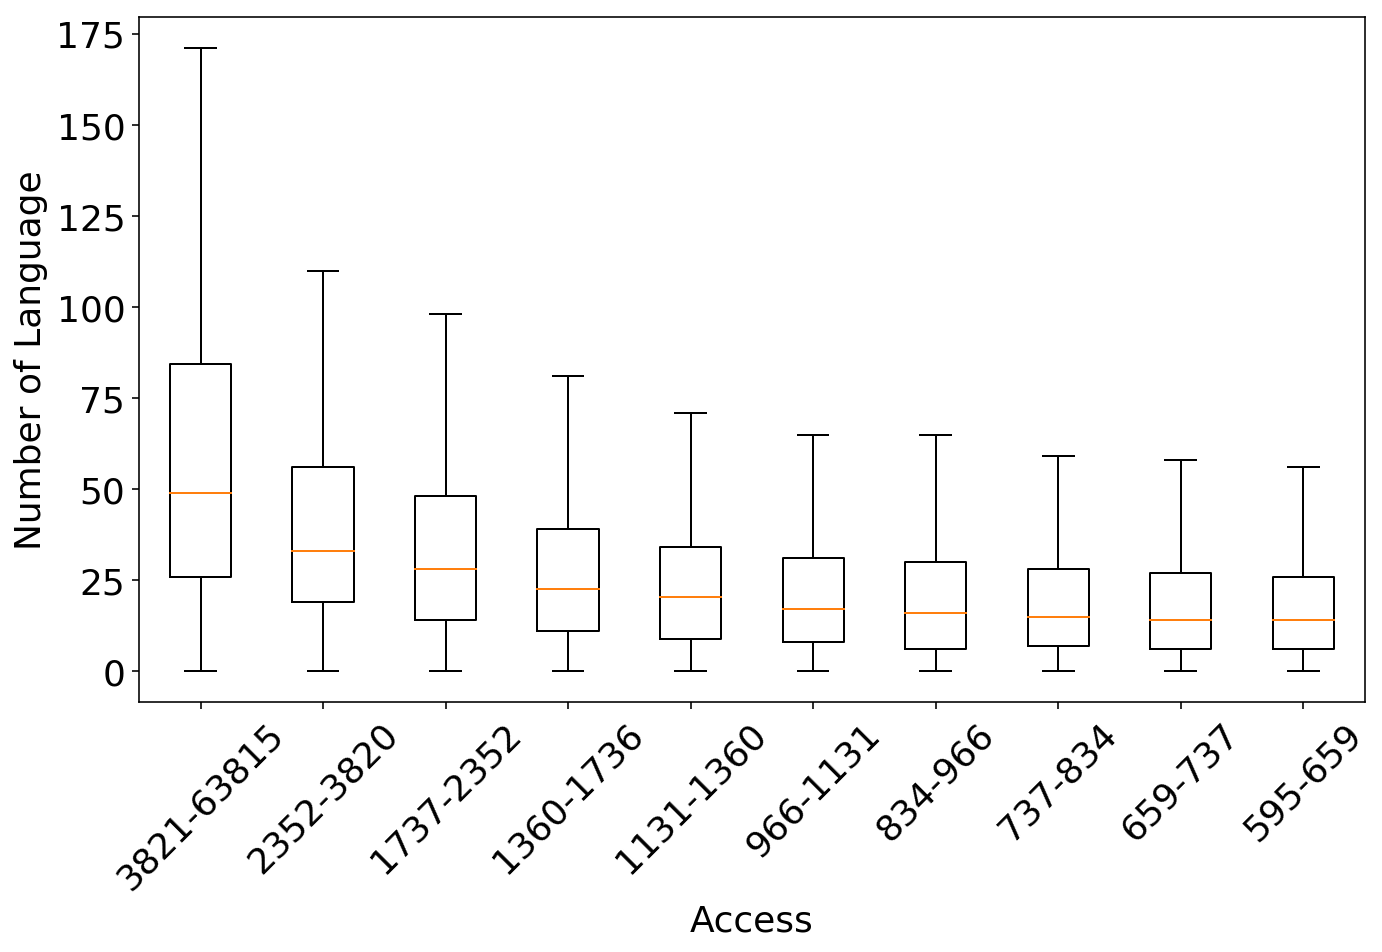

<Figure size 432x288 with 0 Axes>

In [28]:

fig = plt.figure(figsize=(10,7))
matplotlib.rcParams.update({'font.size': 18})
name=np.load('./data/languageName')
number=np.load('./data/languagenumber')
language=np.load('./data/WordsLanguageCounts')

hotwords=pandas.read_csv('./data/revisions/hot_10000.csv',sep='	')
hotwords.sort_values(by=['frequency'],ascending=False,inplace=True)
access=np.zeros((9999,))
for i in range(9999):
    access[i]=hotwords['frequency'].iloc[1+i]

data = []
xlabels = []
for j in range(10):
    if j==9:
        partnumber = language[j*1000:9999]
        partaccess = access[j*1000:9999]
    else:
        partnumber = language[j*1000:1000*(j+1)]
        partaccess = access[j*1000:1000*(j+1)]
    data.append(partnumber)
    xlabels.append("{}-{}".format(int(min(partaccess)),int(max(partaccess))))
plt.boxplot(data,0, '')
plt.xticks(range(1,11), xlabels)
plt.ylabel("Number of Language")
plt.xlabel("Access")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.tight_layout()
plt.show()
plt.tight_layout()
fig.savefig("plots/access-Number_of_Language-boxplot.png", dpi=400)

[197. 111.  32.  32.  25.  25. 149.  29.  29.  32. 180.  27. 178.  71.
  41.  32.  21.  30.  15. 202.  58.  11. 110. 265. 278.  48. 120. 214.
  45.  81. 162. 108.  18. 224. 200.  14.  62. 282.  43.  58.  19.  19.
  35.  47. 105. 178. 161. 196. 142.  65. 103. 137. 162.  78.  62.  38.
  56.  25.  30.   7. 181.  31.  49. 151.  64.  28.   6. 116. 116.  50.
 105. 233.  32. 101.  70.  71.  71. 100.  22. 110.  66.  66.  28.  39.
  54.   4.  15.  97.  89.  67.  79.  18.  50. 202.  13.  42.  55.  87.
 125.   0.]
[  3.  67.  61.   3.  21.  15. 137.  13.  17.   0.   4.   4.   0.   0.
   0.  26.   5.  39.  12.  51.  18.   4.   7.  21.  46.  15.  95.   9.
   0.  11.   4.  25.  10.  15.   0.   0.   4.  38.  16.  10.   3.  22.
   1.  47.   0.   7.  22.   1.   7.  13.   1.  21.  22.  12.  21.  24.
   4.  28.  14.   2.  55.   7.   3.  92.  10.  19.   0.  82.  12.   3.
 116. 116.   2.  11.  39.   8.  64.  27.  12.  33.   8.   8.  27.   3.
  21.  12.   6. 110.  25.  10.   5.  47.  16.  16.  19.  11.   0.

(array([62., 19.,  7.,  4.,  2.,  2.,  3.,  1.]),
 array([  0.   ,  17.125,  34.25 ,  51.375,  68.5  ,  85.625, 102.75 ,
        119.875, 137.   ]),
 <a list of 8 Patch objects>)

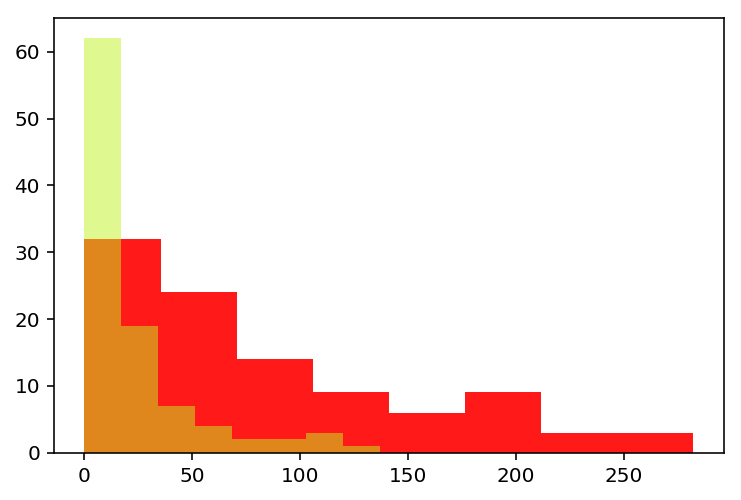

In [160]:
plt.hist(scores1, 8, color="#FF0000", alpha=.9)  
plt.hist(scores2, 8, color="#C1F320", alpha=.5)  

In [270]:
def change_langlinks(lang,page):
    wikipedia.set_lang('en')
    langlinks = page.langlinks
    #print(langlinks.keys())
    return langlinks[lang].title

def get_PageLength(language,tokens):
    tokens=unquote(tokens, 'utf-8')
    p_wiki = wiki_wiki.page(tokens)
    try:
        NewTitle=change_langlinks(language,p_wiki)
        NewTitle=unquote(NewTitle, 'utf-8')
        wikipedia.set_lang(language)
        out=wikipedia.page(NewTitle).content
        return len(out)
    except:
        return 0   
    
get_PageLength('de','Wenger')

6641

In [199]:
def print_langlinks(page):
        langlinks = page.langlinks
        for k in sorted(langlinks.keys()):
            v = langlinks[k]
            print("%s: %s - %s: %s" % (k, v.language, v.title, v.fullurl))
p_wiki = wiki_wiki.page("Math")
print_langlinks(p_wiki)

https://zh.wikipedia.org/wiki/Mathematics


In [247]:
'zh' in name[0:10]

False

In [2]:
hotwords=pandas.read_csv('./data/revisions/hot_10000.csv',sep='	')
hotwords.sort_values(by=['frequency'],ascending=False,inplace=True)
name=np.load('./data/languageName')
number=np.load('./data/languagenumber')
numberofwords=100
wordslist=np.array(hotwords.iloc[1:numberofwords,0])
lengths=np.ones((len(name),numberofwords))
print('start')
for i in tqdm(range(numberofwords)):
    print(i)
    tokens=unquote(wordslist[i],'utf-8')
    wikipedia.set_lang('en')
    wiki_wiki = wikipediaapi.Wikipedia('en')
    p_wiki = wiki_wiki.page(tokens)
    langlinks = p_wiki.langlinks
    try:
        out = len(wikipedia.page(tokens).content)
    except wikipedia.exceptions.DisambiguationError as e:
        try:
            out = len(wikipedia.page(e.options[0]).content)
        except:
            out=0
    except:
            out=0
    lengths[0,i]=out
    for lang in langlinks.keys():
        if lang in name:
            NewTitle=langlinks[lang].title
            NewTitle=unquote(NewTitle, 'utf-8')
            wikipedia.set_lang(lang)
            try:
                out = len(wikipedia.page(NewTitle).content)
            except wikipedia.exceptions.DisambiguationError as e:
                try:
                    out = len(wikipedia.page(e.options[0]).content)
                except:
                    out=0
            except:
                out=0  
            index=list(name).index(lang)
            lengths[index,i]=out
            

  0%|          | 0/100 [00:00<?, ?it/s]

start
0


  1%|          | 1/100 [01:52<3:05:18, 112.31s/it]

1


  2%|▏         | 2/100 [02:54<2:22:38, 87.33s/it] 

2


/home/xuanli2/penv/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
  3%|▎         | 3/100 [03:29<1:52:58, 69.89s/it]

3


  4%|▍         | 4/100 [04:04<1:37:45, 61.10s/it]

4


  5%|▌         | 5/100 [04:21<1:22:42, 52.23s/it]

5


  6%|▌         | 6/100 [04:39<1:12:53, 46.52s/it]

6


  7%|▋         | 7/100 [06:01<1:19:58, 51.60s/it]

7


  8%|▊         | 8/100 [06:20<1:12:55, 47.56s/it]

8


  9%|▉         | 9/100 [06:38<1:07:06, 44.24s/it]

9


 10%|█         | 10/100 [07:00<1:03:06, 42.07s/it]

10


 11%|█         | 11/100 [08:47<1:11:08, 47.97s/it]

11


 12%|█▏        | 12/100 [09:04<1:06:33, 45.38s/it]

12


 13%|█▎        | 13/100 [10:36<1:11:00, 48.98s/it]

13


 14%|█▍        | 14/100 [11:19<1:09:32, 48.52s/it]

14


 15%|█▌        | 15/100 [11:41<1:06:14, 46.76s/it]

15


 16%|█▌        | 16/100 [12:00<1:03:03, 45.04s/it]

16


 17%|█▋        | 17/100 [12:15<59:48, 43.24s/it]  

17


 18%|█▊        | 18/100 [12:33<57:10, 41.84s/it]

18


 19%|█▉        | 19/100 [12:42<54:10, 40.13s/it]

19


 20%|██        | 20/100 [14:28<57:53, 43.41s/it]

20


 21%|██        | 21/100 [15:11<57:10, 43.42s/it]

21


 22%|██▏       | 22/100 [15:20<54:22, 41.83s/it]

22


 23%|██▎       | 23/100 [16:18<54:35, 42.54s/it]

23


 24%|██▍       | 24/100 [18:29<58:32, 46.21s/it]

24


 25%|██▌       | 25/100 [20:38<1:01:56, 49.55s/it]

25


 26%|██▌       | 26/100 [21:10<1:00:16, 48.87s/it]

26


 27%|██▋       | 27/100 [22:20<1:00:23, 49.64s/it]

27


 28%|██▊       | 28/100 [23:59<1:01:41, 51.41s/it]

28


 29%|██▉       | 29/100 [24:24<59:45, 50.50s/it]  

29


 30%|███       | 30/100 [25:13<58:51, 50.45s/it]

30


 31%|███       | 31/100 [26:36<59:13, 51.50s/it]

31


 32%|███▏      | 32/100 [28:08<59:48, 52.77s/it]

32


 33%|███▎      | 33/100 [28:21<57:34, 51.56s/it]

33


 34%|███▍      | 34/100 [30:45<59:41, 54.27s/it]

34


 35%|███▌      | 35/100 [32:23<1:00:08, 55.52s/it]

35


 36%|███▌      | 36/100 [32:31<57:50, 54.22s/it]  

36


 37%|███▋      | 37/100 [33:19<56:44, 54.05s/it]

37


 38%|███▊      | 38/100 [35:38<58:08, 56.27s/it]

38


 39%|███▉      | 39/100 [36:03<56:23, 55.47s/it]

39


 40%|████      | 40/100 [36:34<54:51, 54.85s/it]

40


 41%|████      | 41/100 [36:48<52:57, 53.85s/it]

41


 42%|████▏     | 42/100 [36:59<51:04, 52.84s/it]

42


 43%|████▎     | 43/100 [37:20<49:30, 52.11s/it]

43


 44%|████▍     | 44/100 [37:49<48:08, 51.57s/it]

44


 45%|████▌     | 45/100 [38:54<47:33, 51.89s/it]

45


 46%|████▌     | 46/100 [40:17<47:18, 52.56s/it]

46


 47%|████▋     | 47/100 [41:38<46:57, 53.17s/it]

47


 48%|████▊     | 48/100 [43:14<46:51, 54.06s/it]

48


 49%|████▉     | 49/100 [44:24<46:13, 54.38s/it]

49


 50%|█████     | 50/100 [45:08<45:08, 54.18s/it]

50


 51%|█████     | 51/100 [46:57<45:07, 55.25s/it]

51


 52%|█████▏    | 52/100 [48:09<44:26, 55.56s/it]

52


 53%|█████▎    | 53/100 [49:26<43:50, 55.97s/it]

53


 54%|█████▍    | 54/100 [50:04<42:39, 55.65s/it]

54


 55%|█████▌    | 55/100 [50:38<41:25, 55.24s/it]

55


 56%|█████▌    | 56/100 [51:00<40:04, 54.66s/it]

56


 57%|█████▋    | 57/100 [51:31<38:52, 54.24s/it]

57


 58%|█████▊    | 58/100 [51:46<37:29, 53.56s/it]

58


 59%|█████▉    | 59/100 [52:02<36:09, 52.92s/it]

59


 60%|██████    | 60/100 [52:10<34:47, 52.18s/it]

60


 61%|██████    | 61/100 [53:47<34:23, 52.90s/it]

61


 62%|██████▏   | 62/100 [54:22<33:19, 52.61s/it]

62


 63%|██████▎   | 63/100 [54:46<32:09, 52.16s/it]

63


 64%|██████▍   | 64/100 [56:02<31:31, 52.54s/it]

64


 65%|██████▌   | 65/100 [56:39<30:30, 52.30s/it]

65


 66%|██████▌   | 66/100 [56:56<29:19, 51.76s/it]

66


 67%|██████▋   | 67/100 [57:03<28:06, 51.10s/it]

67


 68%|██████▊   | 68/100 [58:38<27:35, 51.74s/it]

68


 69%|██████▉   | 69/100 [59:37<26:47, 51.84s/it]

69


 70%|███████   | 70/100 [1:00:07<25:46, 51.54s/it]

70


 71%|███████   | 71/100 [1:01:13<25:00, 51.73s/it]

71


 72%|███████▏  | 72/100 [1:03:10<24:34, 52.65s/it]

72


 73%|███████▎  | 73/100 [1:03:30<23:29, 52.20s/it]

73


 74%|███████▍  | 74/100 [1:04:45<22:45, 52.50s/it]

74


 75%|███████▌  | 75/100 [1:05:29<21:49, 52.39s/it]

75


 76%|███████▌  | 76/100 [1:06:13<20:54, 52.28s/it]

76


 77%|███████▋  | 77/100 [1:06:54<19:59, 52.13s/it]

77


 78%|███████▊  | 78/100 [1:07:49<19:07, 52.18s/it]

78


 79%|███████▉  | 79/100 [1:08:05<18:05, 51.71s/it]

79


 80%|████████  | 80/100 [1:09:02<17:15, 51.78s/it]

80


 81%|████████  | 81/100 [1:09:39<16:20, 51.60s/it]

81


 82%|████████▏ | 82/100 [1:10:14<15:25, 51.40s/it]

82


 83%|████████▎ | 83/100 [1:10:35<14:27, 51.02s/it]

83


 84%|████████▍ | 84/100 [1:10:55<13:30, 50.66s/it]

84


 85%|████████▌ | 85/100 [1:11:27<12:36, 50.44s/it]

85


 86%|████████▌ | 86/100 [1:11:29<11:38, 49.88s/it]

86


 87%|████████▋ | 87/100 [1:11:40<10:42, 49.43s/it]

87


 88%|████████▊ | 88/100 [1:12:32<09:53, 49.46s/it]

88


 89%|████████▉ | 89/100 [1:13:23<09:04, 49.47s/it]

89


 90%|█████████ | 90/100 [1:14:06<08:14, 49.41s/it]

90


 91%|█████████ | 91/100 [1:14:47<07:23, 49.32s/it]

91


 92%|█████████▏| 92/100 [1:14:59<06:31, 48.91s/it]

92


 93%|█████████▎| 93/100 [1:15:30<05:40, 48.71s/it]

93


 94%|█████████▍| 94/100 [1:17:04<04:55, 49.20s/it]

94


 95%|█████████▌| 95/100 [1:17:15<04:03, 48.80s/it]

95


 96%|█████████▌| 96/100 [1:17:38<03:14, 48.53s/it]

96


 97%|█████████▋| 97/100 [1:18:09<02:25, 48.35s/it]

97


 98%|█████████▊| 98/100 [1:18:54<01:36, 48.31s/it]

98


 99%|█████████▉| 99/100 [1:19:59<00:48, 48.48s/it]

99


IndexError: index 99 is out of bounds for axis 0 with size 99

In [296]:
wikipedia.set_lang('en')
try:
    out = wikipedia.page('Heroes').content
except wikipedia.exceptions.DisambiguationError as e:
    out = wikipedia.page(e.options[0]).content
print(out)

/home/xuanli2/penv/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


A hero (masculine) or heroine (feminine) is a person or main character of a literary work who, in the face of danger, combats adversity through feats of ingenuity, bravery or strength; the original hero type of classical epics did such things for the sake of glory and honor. On the hand are Medieval and modern heroes, who perform great deeds for the common good instead of the classical goal of pride and fame.
The concept of the hero can be found in classical literature. It is the main or revered character in heroic epic poetry celebrated through ancient legends of a people, often striving for military conquest and living by a continually flawed personal honor code. The definition of a hero has changed throughout time. Merriam Webster dictionary defines a hero as "a person who is admired for great or brave acts or fine qualities." Examples of heroes range from mythological figures, such as Gilgamesh, Achilles and Iphigenia, to historical figures, such as Joan of Arc, modern heroes like 

In [288]:
hotwords.iloc[1:numberofwords,0]

4032               World_War_II
2164                  Hard_disk
3360                     Heroes
4660                     Heroes
8033           Data_(Star_Trek)
7598    Super_Smash_Bros._Brawl
9004                Che_Guevara
5406             Blackwater_USA
3139             Blackwater_USA
Name: entry, dtype: object

In [ ]:
lengths.shape

In [316]:
anotherLength=np.zeros(251,1000)
anotherLength=lengths
for i in range(251):
    anotherLength[i,0]-=1
print(anotherLength)
np.true_divide(anotherLength.sum(1),(anotherLength!=0).sum(1))

[[     0.      0.      0. ...      0.      0.      0.]
 [ 63517.  30664.   9701. ...      0.      0.      0.]
 [217316.  72600.      0. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]]


/home/xuanli2/penv/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


array([           nan, 3.46273333e+04, 1.44958000e+05, 1.01639000e+05,
       3.82590000e+04, 2.10580000e+04, 8.56150000e+04, 4.57300000e+04,
       4.66350000e+04, 7.32330000e+04, 3.80285000e+04, 3.36305000e+04,
       3.42480000e+04, 1.62290000e+04, 2.42620000e+04, 5.54420000e+04,
       4.63370000e+04, 3.89460000e+04, 7.26090000e+04, 4.44860000e+04,
       2.20360000e+04, 3.77050000e+04, 8.99735000e+04, 5.47960000e+04,
       4.63825000e+04, 3.13270000e+04, 3.43155000e+04, 4.52575000e+04,
       1.06760000e+04, 1.92220000e+04, 5.48845000e+04, 3.16165000e+04,
       2.99945000e+04, 3.64610000e+04, 1.31850000e+04, 4.97505000e+04,
       3.01910000e+04, 6.65905000e+04,            nan, 6.25275000e+04,
       1.42145000e+04, 1.12400000e+03, 1.43485000e+04, 1.04180000e+04,
       1.09570000e+04, 2.87040000e+04, 5.25900000e+03, 5.32895000e+04,
       3.31035000e+04, 2.31580000e+04, 7.50730000e+04, 3.08705000e+04,
       5.25850000e+03, 7.87600000e+03, 7.40200000e+03, 1.84135000e+04,
      

In [ ]:
print('1')

In [1]:
from progress.bar import Bar

ImportError: No module named 'progress'

In [2]:
from tqdm import tqdm

In [11]:
language.shape

AttributeError: 'dict' object has no attribute 'shape'

In [30]:
type(language)

dict

In [28]:
number.dump('./data/languagenumber')

In [24]:
test=np.load('./data/languageName')

In [29]:
LangCount.dump('./data/WordsLanguageCounts')

In [37]:
list(name).index('en')


0

In [4]:
counts=np.load('./data/WordsLanguageCounts')

In [5]:
counts.shape

(9999,)

In [6]:
counts

array([198., 111.,  32., ...,   0.,   4.,  11.])

In [13]:
lengths.dump('./data/LanLengths')

In [4]:
lengths=np.load('./data/LanLengths')

NameError: name 'np' is not defined

In [2]:
language=np.load('./data/WordsLanguageCounts')

In [5]:
language.shape

(9999,)

In [6]:
hotwords=pandas.read_csv('./data/revisions/hot_10000.csv',sep='	')

In [24]:
access[1]

61565.0

In [ ]:
print('1')

In [4]:
language=np.load('./data/WordsLanguageCounts')

In [5]:
language.shape

(9999,)

In [8]:
list=[1.0,2,3,4]

In [10]:
int(list)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [8]:
number=np.load('./data/languagenumber')
number.shape

(251,)

<Figure size 432x288 with 0 Axes>

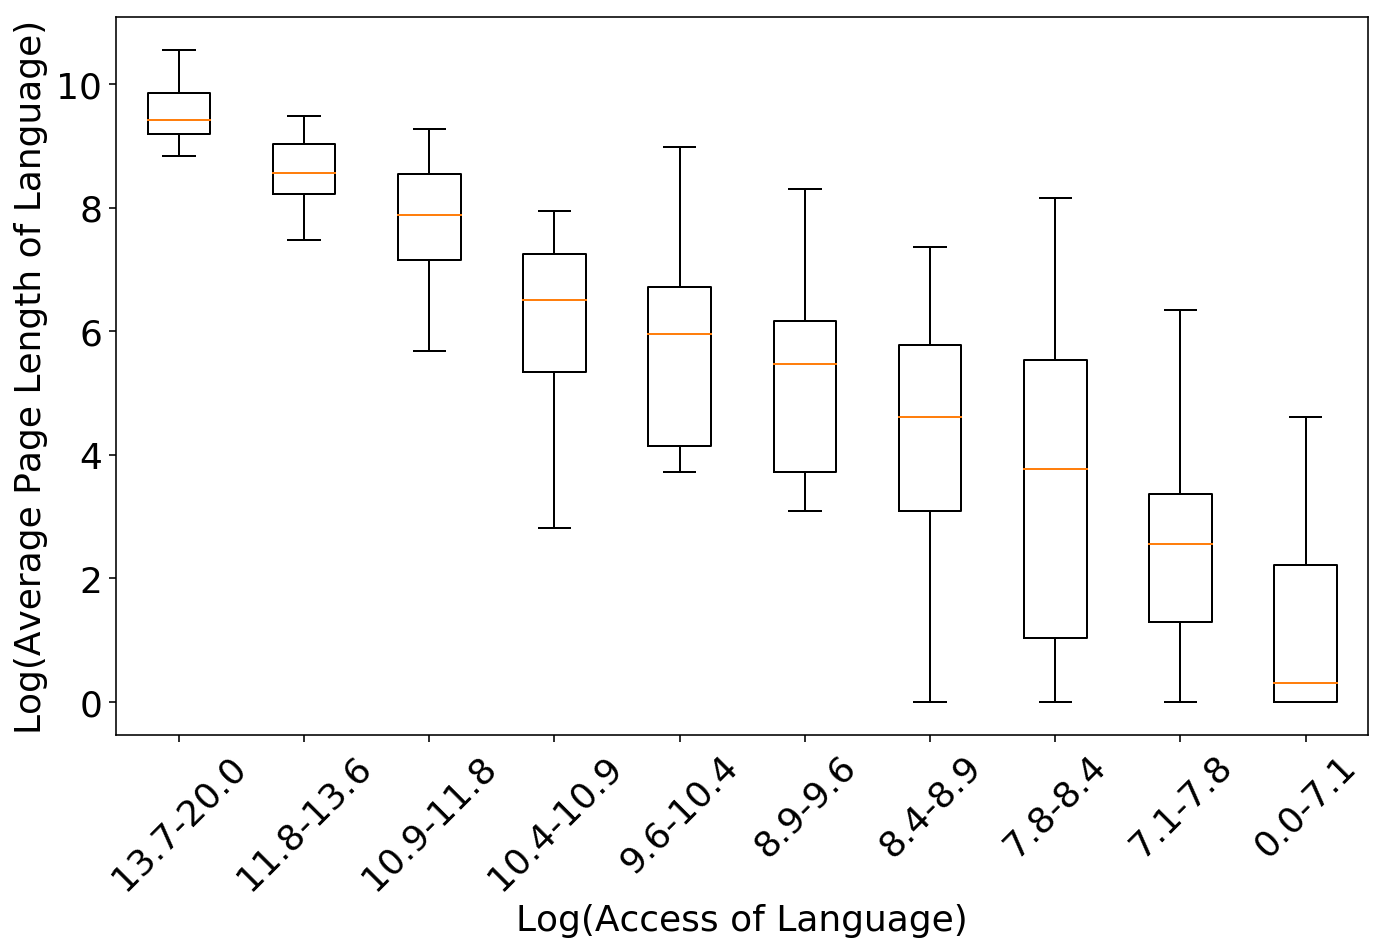

<Figure size 432x288 with 0 Axes>

In [5]:
fig = plt.figure()
fig = plt.figure(figsize=(10,7))
matplotlib.rcParams.update({'font.size': 18})
lengths=np.load('./data/LanLengths')
lengths=lengths.mean(1)
number=np.load('./data/languagenumber')
data = []
xlabels = []
for j in range(10):
    if j==9:
        partlengths = np.log(lengths[j*25:251])
        partnumber = number[j*25:251]
    else:
        partlengths = np.log(lengths[j*25:25*(j+1)])
        partnumber = number[j*25:25*(j+1)]
    data.append(partlengths)
    xlabels.append("{}-{}".format('{:.1f}'.format(min(partnumber)),'{:.1f}'.format(max(partnumber))))
plt.boxplot(data,0, '')
plt.xticks(range(1,11), xlabels)
plt.ylabel("Log(Average Page Length of Language)")
plt.xlabel("Log(Access of Language)")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.tight_layout()
plt.show()
plt.tight_layout()
fig.savefig("plots/Log(Average_Length_of_Language)-Log(Access_of_Language)-boxplot.png", dpi=400)

In [29]:
def mean_interval_estimation(name,lengths,index1,index2,alpha):
    data=lengths[index1]-lengths[index2]
    sample_mean = np.mean(data)
    sample_std = np.std(data)
    sample_size = len(data)
    t_score = stats.t.isf(alpha / 2, df = (sample_size-1) )
    ME = t_score * sample_std / np.sqrt(sample_size)
    lower_limit = sample_mean - ME
    upper_limit = sample_mean + ME
    print('the difference between page average length of "{}" and "{}"'.format(name[index1],name[index2]))
    print( str((1-alpha)*100)+ '%% Confidence Interval: ( %.2f, %.2f)' % (lower_limit, upper_limit))
name=np.load('./data/languageName')
lengths=np.load('./data/LanLengths')
mean_interval_estimation(name,lengths,10,100,0.05)

the difference between page average length of "tr" and "nrm"
95.0% Confidence Interval: ( 6398.31, 12063.29)


In [23]:
from pydoc import help
from scipy.stats.stats import pearsonr
lengths=np.load('./data/LanLengths')
lengths=lengths.mean(1)
number=np.load('./data/languagenumber')
data = []
xlabels = []
for j in range(10):
    if j==9:
        data.append(np.log(lengths[j*25:251]).mean())
        xlabels.append(number[j*25:251].mean())
    else:
        data.append(np.log(lengths[j*25:25*(j+1)]).mean())
        xlabels.append(number[j*25:25*(j+1)].mean())
print(data,xlabels)
pearsonr(data,xlabels)

[9.574446857140728, 8.238359126513588, 7.695321825498663, 5.988261947441086, 5.3933230965445444, 5.245709095715788, 4.36847258787239, 3.512463601761344, 2.516119036221201, 1.2034466707004368] [15.663420359375078, 12.815737278768543, 11.253649573387689, 10.662108173947763, 10.072997286674028, 9.20917218095651, 8.682458051683305, 8.143767118223668, 7.477083267191291, 6.270181163398149]


(0.9694085214835572, 3.6927258519551204e-06)

(array([ 290., 2087., 1789., 1587., 5300., 2079., 5348., 2263., 2046.,
        2171., 1588., 1258., 1708., 2229., 2426., 2315., 2089., 1891.,
        1229., 1461., 2051., 2171., 1877., 2147., 1659., 1231., 1592.,
        2114., 2278., 2062., 2075., 1754., 1195., 1000.]),
 array([ 1.        ,  1.97058824,  2.94117647,  3.91176471,  4.88235294,
         5.85294118,  6.82352941,  7.79411765,  8.76470588,  9.73529412,
        10.70588235, 11.67647059, 12.64705882, 13.61764706, 14.58823529,
        15.55882353, 16.52941176, 17.5       , 18.47058824, 19.44117647,
        20.41176471, 21.38235294, 22.35294118, 23.32352941, 24.29411765,
        25.26470588, 26.23529412, 27.20588235, 28.17647059, 29.14705882,
        30.11764706, 31.08823529, 32.05882353, 33.02941176, 34.        ]),
 <a list of 34 Patch objects>)

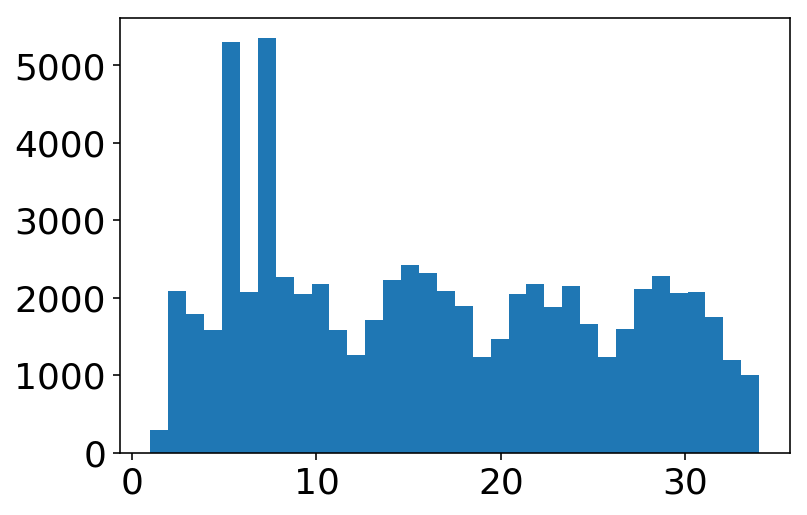

In [24]:
listdate=[]
time=timestamp['World_War_II']
for i in range(0,len(time)):
    a=float(time[i])
    listdate.append(datetime.fromtimestamp(a))
X=[]
for i in range(0,len(time)):
    if(listdate[i].month==9):
        value=listdate[i].day-17
    else:
        value=listdate[i].day+13
    X.append(value) 
plt.hist(X,34)

In [23]:
timestamp=np.load('./data/dump/word_access_timestamps_02000-03000.pkl')

['1192332042.420',
 '1192332185.314',
 '1192332199.578',
 '1192332207.964',
 '1192332214.899',
 '1192332376.750',
 '1192332409.669',
 '1192332438.419',
 '1192332443.853',
 '1192332485.427',
 '1192332632.416',
 '1192332767.955',
 '1192332819.767',
 '1192332839.681',
 '1192333173.665',
 '1192333267.829',
 '1192333495.842',
 '1192333552.442',
 '1192333588.332',
 '1192333590.973',
 '1192333678.906',
 '1192333687.663',
 '1192333708.093',
 '1192333792.879',
 '1192333912.535',
 '1192333946.367',
 '1192334150.371',
 '1192334204.676',
 '1192334272.283',
 '1192334419.441',
 '1192334460.424',
 '1192334485.794',
 '1192334665.172',
 '1192334686.685',
 '1192334728.326',
 '1192334762.968',
 '1192334842.643',
 '1192334894.483',
 '1192335016.950',
 '1192335031.504',
 '1192335074.610',
 '1192335113.666',
 '1192335340.326',
 '1192335532.746',
 '1192335537.586',
 '1192335578.039',
 '1190747660.678',
 '1190747682.303',
 '1190747683.410',
 '1190747725.544',
 '1190747807.248',
 '1190747811.872',
 '1190747850

In [12]:
timestamp.keys()

dict_keys(['Donald_Trump', 'Yeast', 'Tiger', 'Guy_Fawkes', 'sort_down.gif', 'Chris_Crocker', 'Jennie_Garth', 'Rock_Lee', 'The_Bourne_Ultimatum_%28film%29', 'Jessica_Biel', 'Steel', 'Sexual_intercourse', 'Intersex', 'North_Carolina', 'Ninja', 'Diamond', 'Survivor_%28TV_series%29', 'Russian_language', 'Connecticut', 'Tailed_beasts', 'List_of_search_engines', 'Atlantic_Ocean', 'Fungus', 'Wayne_Rooney', 'Candice_Michelle', 'Radiation', 'Virus', 'Dean_Martin', 'Backstreet_Boys', 'LimeWire', 'Pubic_hair', 'Neon_Genesis_Evangelion', 'Jutsu_%28Naruto%29', 'The_Rock_%28entertainer%29', 'The_Lord_of_the_Rings', 'Democritus', 'Covalent_bond', 'Category_5_cable', 'Food', 'Electromagnetic_spectrum', 'Shocker_%28hand_gesture%29', 'Free', 'Buenos_Aires', 'Jenny_McCarthy', 'Human_anatomy', 'Friction', 'Hymen', 'John_Bonham', 'Harry_Potter_and_the_Half-Blood_Prince_(film)', 'Frank_Zappa', 'Marbury_v._Madison', 'Eukaryote', 'Ayn_Rand', 'Battle_of_Waterloo', 'H.264', 'Unicode', 'Baroque', 'Steve_Fossett'

In [71]:
import urllib
def get_language_word_distribution(word):
    path = "./data/only_lemma/"
    timezh=[]
    timeja=[]
    timeen=[]
    timefr=[]
    zhtitle='第二次世界大战'
    jatitle='第二次世界大戦'
    frtitle='Seconde_Guerre_mondiale'
    zhtitle=urllib.parse.quote(zhtitle)
    jatitle=urllib.parse.quote(jatitle)
    frtitle=urllib.parse.quote(frtitle)
    print(jatitle,zhtitle,frtitle)
    files= os.listdir(path)
    for lines in tqdm(files):
        file_name='./data/only_lemma/'+lines
        for line in open(file_name):
            timestamp, url=line.strip().split(' ')[1:3]
            lemma=url[url.rfind('/')+1:]
            if word==lemma or lemma==zhtitle or lemma==jatitle:
                out = re.findall('[http|https]://([a-z]{2,3}).',line)[0]
                if out=='zh':
                    timezh.append(timestamp)
                if out=='en':
                    timeen.append(timestamp)
                if out=='ja':
                    timeja.append(timestamp)
                if out=='fr':
                    timefr.append(timestamp)
    return timezh,timeja,timeen,timefr


timezh,timeja,timeen,timefr=get_language_word_distribution('World_War_II')
# langaue is a dictionary 'language':counts

  0%|          | 0/792 [00:00<?, ?it/s]

%E7%AC%AC%E4%BA%8C%E6%AC%A1%E4%B8%96%E7%95%8C%E5%A4%A7%E6%88%A6 %E7%AC%AC%E4%BA%8C%E6%AC%A1%E4%B8%96%E7%95%8C%E5%A4%A7%E6%88%98 Seconde_Guerre_mondiale


100%|██████████| 792/792 [27:07<00:00,  2.06s/it]


In [ ]:
def get_lemma_timestamps_from_file_reset(file_name, entry_list):
    timestamps = {}
    with open(file_name) as f:
        for line in f:
            timestamp, url=line.strip().split(' ')[1:3]
            if url[7:9] != 'en':
                continue
            lemma=url[url.rfind('/')+1:]
            if lemma in entry_list:
                try:
                    timestamps[lemma].append(timestamp)
                except:
                    timestamps[lemma] = [timestamp]
        return timestamps

In [32]:
url='http://en.wikipedia.org/wiki/Special:Random'
url[url.rfind('/')+1:]

'Special:Random'

In [37]:
len(timeen)

68360

In [52]:
tokens=unquote('World_War_II','utf-8')
wikipedia.set_lang('en')
wiki_wiki = wikipediaapi.Wikipedia('en')
p_wiki = wiki_wiki.page(tokens)
langlinks = p_wiki.langlinks
langlinks.keys()
langlinks['fr'].title
#unquote(NewTitle, 'utf-8')


'Seconde Guerre mondiale'

In [75]:
len(timeen)

68361

(array([ 290., 2087., 1789., 1588., 5300., 2079., 5348., 2263., 2046.,
        2171., 1588., 1258., 1708., 2229., 2426., 2315., 2089., 1891.,
        1229., 1461., 2051., 2171., 1877., 2147., 1659., 1231., 1592.,
        2114., 2278., 2062., 2075., 1754., 1195., 1000.]),
 array([ 1.        ,  1.97058824,  2.94117647,  3.91176471,  4.88235294,
         5.85294118,  6.82352941,  7.79411765,  8.76470588,  9.73529412,
        10.70588235, 11.67647059, 12.64705882, 13.61764706, 14.58823529,
        15.55882353, 16.52941176, 17.5       , 18.47058824, 19.44117647,
        20.41176471, 21.38235294, 22.35294118, 23.32352941, 24.29411765,
        25.26470588, 26.23529412, 27.20588235, 28.17647059, 29.14705882,
        30.11764706, 31.08823529, 32.05882353, 33.02941176, 34.        ]),
 <a list of 34 Patch objects>)

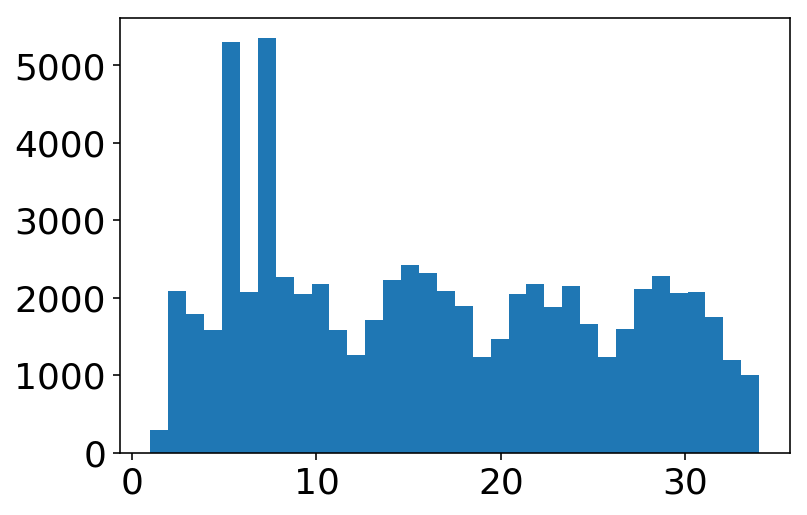

In [93]:
from sklearn import preprocessing
#timezh=sklearn.preprocessing.normalize(timezh)
#timeja=sklearn.preprocessing.normalize(timeja)
#timefr=sklearn.preprocessing.normalize(timefr)
def get_time_distribution(time):
    listdate=[]
    for i in range(0,len(time)):
        a=float(timeen[i])
        listdate.append(datetime.fromtimestamp(a))
    X=[]
    for i in range(0,len(time)):
        if(listdate[i].month==9):
            value=listdate[i].day-17
        else:
            value=listdate[i].day+13
        X.append(value)
    return X

X=get_time_distribution(timeen)
Y=get_time_distribution(timeja)
plt.hist(X,34)
#plt.hist(Y,34)

In [82]:
X

[9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 2

In [85]:
len(timeja)

7877

In [120]:
x=np.array([123., 261., 134., 123.,  92., 914., 211., 268., 395., 593., 231.,
        247., 607., 242., 365., 267.,   0.,   0.,  49., 245., 111., 197.,
        200., 210., 282.,  61., 216., 105., 110., 329., 375.,  25.,  74.,
        215.])
y=np.array([ 290., 2087., 1789., 1588., 5300., 2079., 5348., 2263., 2046.,
        2171., 1588., 1258., 1708., 2229., 2426., 2315., 2089., 1891.,
        1229., 1461., 2051., 2171., 1877., 2147., 1659., 1231., 1592.,
        2114., 2278., 2062., 2075., 1754., 1195., 1000.])

<BarContainer object of 34 artists>

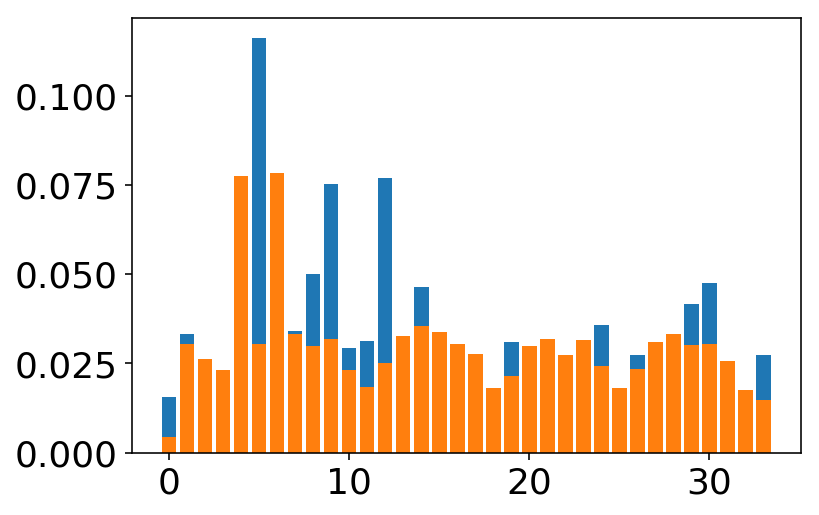

In [122]:
x=x/np.sum(x)
y=y/np.sum(y)

plt.bar(list(range(34)),x)
plt.bar(list(range(34)),y)

In [102]:
x

array([0.01561508, 0.03313444, 0.01701155, 0.01561508, 0.01167957,
       0.11603402, 0.02678685, 0.03402311, 0.05014599, 0.07528247,
       0.02932589, 0.03135712, 0.07705979, 0.03072236, 0.04633744,
       0.03389615, 0.        , 0.        , 0.00622064, 0.03110321,
       0.01409166, 0.02500952, 0.02539038, 0.0266599 , 0.03580043,
       0.00774406, 0.02742161, 0.01332995, 0.01396471, 0.04176717,
       0.04760696, 0.0031738 , 0.00939444, 0.02729466])

In [103]:
len(x)

34

In [114]:
x=list(range(34))

In [115]:
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [127]:

stats.ks_2samp(X,Y)

Ks_2sampResult(statistic=0.09905672990614721, pvalue=8.499699898622382e-61)

In [129]:
test=np.array(X)-np.ones(len(X))

In [133]:
np.sum(test==-1)

0